[View in Colaboratory](https://colab.research.google.com/github/Jeuni/dubluve/blob/master/RNN-modified.ipynb)

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install pandas

    100% |████████████████████████████████| 253.3MB 126kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x4f486000 @  0x7f7a39eb31c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [5]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow2

# For a specific version:
!pip install tensorflow==1.2

# For the latest nightly build:
!pip install tf-nightly

Name: tensorflow
Version: 1.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: setuptools, termcolor, protobuf, numpy, six, gast, absl-py, wheel, grpcio, tensorboard, astor
Required-by: 
  Could not find a version that satisfies the requirement tensorflow2 (from versions: )
No matching distribution found for tensorflow2
    100% |████████████████████████████████| 35.0MB 499kB/s 
    100% |████████████████████████████████| 245kB 21.3MB/s 
    100% |████████████████████████████████| 890kB 9.9MB/s 
  Running setup.py bdist_wheel for markdown ... - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/b6/52/17/f0af18e3e0ec6fa60b361ffed15b4c3468f6f3bcdb87fbe079
  Running setup.py bdist_wheel for html5lib ... - \ done
  Stored in directory: /root/.cache/pip/whe

In [0]:
#Import
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as pl

In [7]:
#Import datasets & set datasets

X_data = list()
Y_data = list()
def load1(x, y, result):
  n_datasets = int(input('Please type the number of datasets : '))
  filename = input('Please type the name of files : ')
  path = 'drive/datasets/'
  for i in range(1, n_datasets):
    name = path + filename + '/' + filename + str(i) + '.csv'
    file= pd.read_csv(name)
    dataset = file.values.tolist()
    for row in dataset:
      rows =list()
      for column in row:
        rows.append(column.split())
      rowdata = [list(map(int,i)) for i in rows]
      x.append(rowdata[0])
      y.append(result)
          
def load2(x, y, result):
  n_datasets = int(input('Please type the number of datasets : '))
  filename = input('Please type the name of files : ')
  path = 'drive/datasets/nobody/'
  for i in range(1, n_datasets):
      file= pd.read_csv(path + filename + '/' + filename + str(i) + '.csv')
      dataset = file.values.tolist()
      for row in dataset:
        rows =list()
        for column in row:
          rows.append(column.split())
        rowdata = [list(map(int,i)) for i in rows]
        x.append(rowdata[0])
        y.append(result)

n = int(input("Please type the number of days: "))

for i in range(n):
  load1(X_data, Y_data, [1, 0]) # Exist


Please type the number of days: 5
Please type the number of datasets : 181
Please type the name of files : labeled_data1_20180814_153212_human
Please type the number of datasets : 127
Please type the name of files : labeled_data1_20180813_164819_human
Please type the number of datasets : 291
Please type the name of files : labeled_data1_20180810_125246_human
Please type the number of datasets : 156
Please type the name of files : labeled_data1_20180810_092138_human
Please type the number of datasets : 87
Please type the name of files : labeled_data1_20180809_173925_human


In [8]:
load2(X_data, Y_data, [0, 1])

Please type the number of datasets : 59
Please type the name of files : labeled_data1_20180814_102745_none


In [0]:
learning_rate = 0.02
total_epoch = 50
batch_size = 500

n_input = 100
n_step = len(X_data)
n_hidden = 128
n_class = 2



In [0]:
tf.reset_default_graph()
# Set X, Y as place holder
X = tf.placeholder(tf.float32, [None, n_step, n_input])
Y = tf.placeholder(tf.float32, [None, n_class])

In [0]:
W = tf.Variable(tf.random_uniform([n_hidden, n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [0]:
cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
#cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
#cell = tf.nn.rnn_cell.GRUCell(n_hidden)

# To avoid overfitting
cell = tf.nn.rnn_cell.DropoutWrapper(cell, output_keep_prob=0.5)

#cell2 = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)

# Make combination of cells 
#multi_cell = tf.nn.rnn_cell.MultiRNNCell([cell, cell2])

In [0]:
# Make  Deep RNN
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# Final output layers
outputs = tf.transpose(outputs, [1, 0, 2])
outputs = outputs[-1]

model = tf.matmul(outputs, W) + b

In [0]:
# Cross-Entropy_v2
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [27]:
# Training 
sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())
sess.run(tf.global_variables_initializer())


# make input and target to train
batch_xs = np.reshape(X_data, (-1, n_step, n_input))
batch_ys = Y_data

for epoch in range(total_epoch):
  _, loss =  sess.run([optimizer, cost], 
                      feed_dict={X: batch_xs, Y: batch_ys})
  
  buff = list()
  buff.append(format(loss))
  
 
    
  print('Epoch:', '%04d' % (epoch + 1),
       'Avg. cost =', '{:.3f}'.format(loss))
  
print('최적화 완료!')

saver.save(sess, 'drive/model/rnn', total_epoch)

Epoch: 0001 Avg. cost = 0.704
Epoch: 0002 Avg. cost = 0.769
Epoch: 0003 Avg. cost = 3.620
Epoch: 0004 Avg. cost = 0.745
Epoch: 0005 Avg. cost = 1.098
Epoch: 0006 Avg. cost = 2.017
Epoch: 0007 Avg. cost = 0.996
Epoch: 0008 Avg. cost = 1.114
Epoch: 0009 Avg. cost = 2.011
Epoch: 0010 Avg. cost = 4.478
Epoch: 0011 Avg. cost = 3.823
Epoch: 0012 Avg. cost = 3.691
Epoch: 0013 Avg. cost = 4.018
Epoch: 0014 Avg. cost = 2.486
Epoch: 0015 Avg. cost = 3.392
Epoch: 0016 Avg. cost = 1.589
Epoch: 0017 Avg. cost = 0.690
Epoch: 0018 Avg. cost = 1.765
Epoch: 0019 Avg. cost = 0.698
Epoch: 0020 Avg. cost = 2.526
Epoch: 0021 Avg. cost = 5.474
Epoch: 0022 Avg. cost = 1.286
Epoch: 0023 Avg. cost = 2.865
Epoch: 0024 Avg. cost = 0.782
Epoch: 0025 Avg. cost = 0.694
Epoch: 0026 Avg. cost = 2.525
Epoch: 0027 Avg. cost = 2.217
Epoch: 0028 Avg. cost = 0.715
Epoch: 0029 Avg. cost = 4.812
Epoch: 0030 Avg. cost = 3.390
Epoch: 0031 Avg. cost = 2.104
Epoch: 0032 Avg. cost = 0.827
Epoch: 0033 Avg. cost = 0.984
Epoch: 003

'drive/model/rnn-50'

['1.5922071933746338']
정확도: 44.88


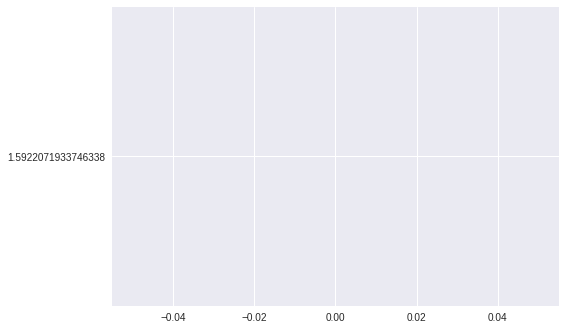

In [28]:
# Print the Accuracy

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print(buff)
pl.plot(buff)

#test_batch_size = len(X_data)
#test_xs = np.reshape(X_data, (-1, n_step, n_input))
#test_ys = Y_data

print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: batch_xs, Y: batch_ys}))